<a href="https://colab.research.google.com/github/dwishashah/Machine-Learning/blob/main/ML_Exp2_bc_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
x=df[['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']]
y=df['diagnosis']

In [ ]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy",random_state=200)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=200)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
result=pd.DataFrame()
result["actual_y"]=y_test
result['predicted_y']=y_pred
print(result.sample(5))

     actual_y  predicted_y
141         0            0
332         1            1
306         1            1
457         1            1
176         1            1


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
print("accuracy score is ",accuracy_score(y_test,y_pred))
cm=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=list(range(0,2)))
print(cm)

accuracy score is  0.9122807017543859
    0   1
0  40   5
1   5  64


In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
print("precision score is ",precision_score(y_test,y_pred,average=None))
print("recall score is ",recall_score(y_test,y_pred,average=None))
print("f1 score is ",f1_score(y_test,y_pred,average=None))

precision score is  [0.88888889 0.92753623]
recall score is  [0.88888889 0.92753623]
f1 score is  [0.88888889 0.92753623]


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print("classification report is ")
print(classification_report(y_test,y_pred))


classification report is 
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        45
           1       0.93      0.93      0.93        69

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



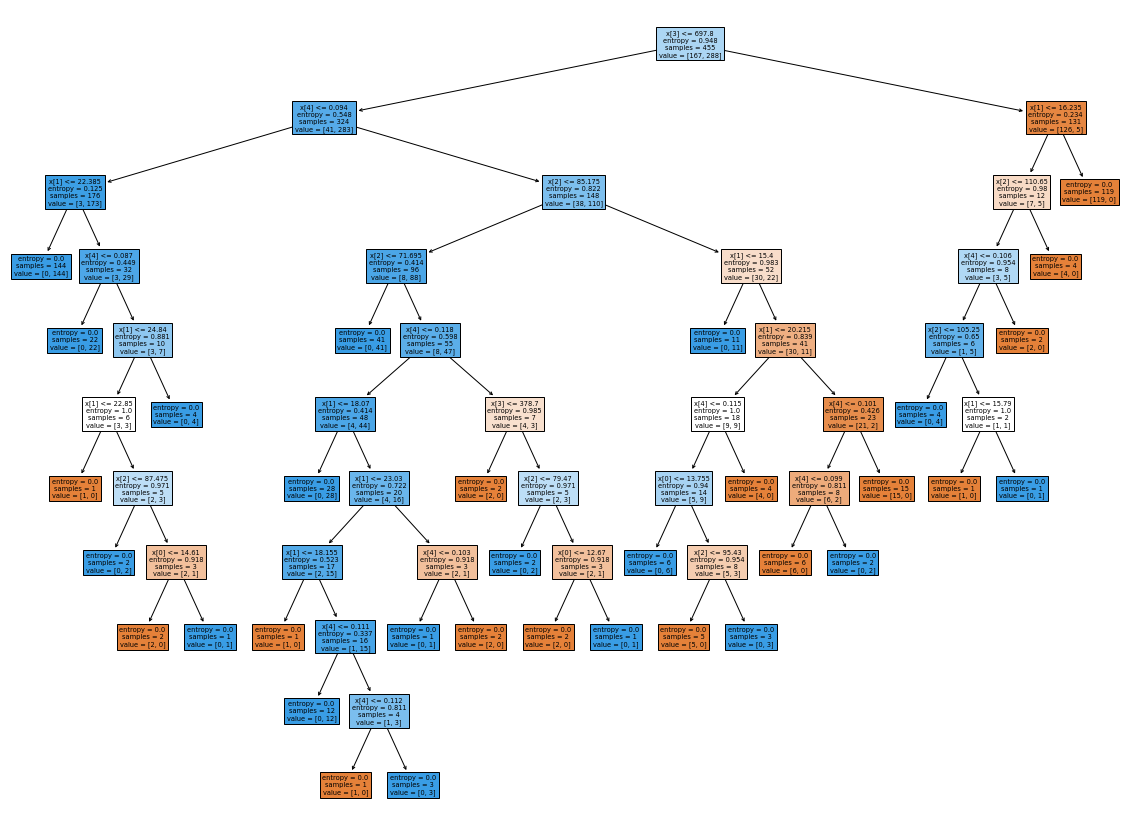

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,15))
plot_tree(classifier,filled=True)
plt.show()


In [ ]:
max_depth = classifier.tree_.max_depth
max_depth

10

In [ ]:
for i in range(max_depth):

  dtc =DecisionTreeClassifier(max_depth=i+1)
  dtc.fit(x_train,y_train)

  train_z = dtc.predict(x_train)
  train_z_prob = dtc.predict_proba(x_train)[:,1]

  test_z = dtc.predict(x_test)
  test_z_prob = dtc.predict_proba(x_test)[:,1]

  a=accuracy_score(y_test, test_z)
  print(f"model accuracy at depth {i+1} is :{a}")

model accuracy at depth 1 is :0.8771929824561403
model accuracy at depth 2 is :0.8771929824561403
model accuracy at depth 3 is :0.8859649122807017
model accuracy at depth 4 is :0.9035087719298246
model accuracy at depth 5 is :0.9035087719298246
model accuracy at depth 6 is :0.9210526315789473
model accuracy at depth 7 is :0.8947368421052632
model accuracy at depth 8 is :0.9035087719298246
model accuracy at depth 9 is :0.8947368421052632
model accuracy at depth 10 is :0.8947368421052632


1, train: 0.899, test: 0.877
2, train: 0.899, test: 0.877
3, train: 0.932, test: 0.886
4, train: 0.952, test: 0.886
5, train: 0.969, test: 0.904
6, train: 0.976, test: 0.921
7, train: 0.987, test: 0.895
8, train: 0.996, test: 0.904
9, train: 1.000, test: 0.895
10, train: 1.000, test: 0.904


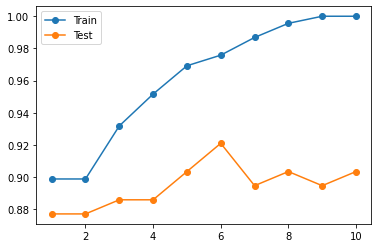

In [ ]:
train_scores, test_scores = list(), list()
values = [i for i in range(1, 11)]

for i in values:

 model = DecisionTreeClassifier(max_depth=i)

 model.fit(x_train, y_train)

 train_yhat = model.predict(x_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 
 test_yhat = model.predict(x_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)

 print('%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))

plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.legend()
plt.show()